In [88]:
from pandas import *
from keras import *
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
# load dataset and print head
df = pandas.read_csv("ScrappedDataClean.csv")
print(df.shape)
df.head(5)

(3912, 12)


,Date,Adress,Size,Rooms,Broker,Rent,Price,NearbyPOIs,Latitude,Longitude,PricePerKvm,PricePerRoom
0,20210610.0,Skebokvarnsvägen 366,92.5,4.0,Fastighetsbyrån Farsta/ Högdalen/ Skogås,5953.0,3950000.0,21.0,59.261980,18.040237,42703.0,987500.0
1,20210610.0,Beckomberga Ängsväg 22,91.0,4.0,Svenska Mäklarhuset Bromma,4730.0,5000000.0,20.0,59.356955,17.899475,54945.0,1250000.0
2,2021069.0,Brf Grindavik - Kista Gårdsväg,91.1,4.0,Våningen & Villan Stockholm,4803.0,3995000.0,82.0,59.407398,17.943506,43853.0,998750.0
3,2021069.0,Arbetargatan 23A,92.0,3.0,HusmanHagberg Kungsholmen,4338.0,6650000.0,468.0,59.334550,18.027191,72283.0,2216667.0
4,2021069.0,Kista Alléväg 9,91.1,4.0,Våningen & Villan Stockholm,4803.0,3995000.0,81.0,59.407664,17.944107,43853.0,998750.0


In [3]:
#Show Data Types
df.dtypes

Date            float64
Adress           object
Size            float64
Rooms           float64
Broker           object
Rent            float64
Price           float64
NearbyPOIs      float64
Latitude        float64
Longitude       float64
PricePerKvm     float64
PricePerRoom    float64
dtype: object

In [4]:
#Drop Columns not used for model
df = df.drop(['Date', 'Adress', 'Broker', 'PricePerKvm', 'PricePerRoom'], axis=1)
df.head(5)

,Size,Rooms,Rent,Price,NearbyPOIs,Latitude,Longitude
0,92.5,4.0,5953.0,3950000.0,21.0,59.261980,18.040237
1,91.0,4.0,4730.0,5000000.0,20.0,59.356955,17.899475
2,91.1,4.0,4803.0,3995000.0,82.0,59.407398,17.943506
3,92.0,3.0,4338.0,6650000.0,468.0,59.334550,18.027191
4,91.1,4.0,4803.0,3995000.0,81.0,59.407664,17.944107


In [5]:
# Number of rows
df.count()

Size          3912
Rooms         3912
Rent          3912
Price         3912
NearbyPOIs    3912
Latitude      3912
Longitude     3912
dtype: int64

In [6]:
# Check if there are missing values
print(df.isna().sum())

Size          0
Rooms         0
Rent          0
Price         0
NearbyPOIs    0
Latitude      0
Longitude     0
dtype: int64


In [7]:
#Statistic Overview
df.describe()

,Size,Rooms,Rent,Price,NearbyPOIs,Latitude,Longitude
count,3912.000000,3912.000000,3912.000000,3.912000e+03,3912.000000,3912.000000,3912.000000
mean,94.796472,3.957566,5104.874489,4.701479e+06,167.335890,59.317368,18.008050
std,2.914669,0.201602,783.666825,1.553765e+06,272.932101,0.041035,0.073127
min,90.000000,3.000000,1974.000000,1.150000e+06,4.000000,59.232487,17.803345
25%,92.000000,4.000000,4653.500000,3.398750e+06,28.000000,59.287940,17.950974
50%,95.000000,4.000000,5138.500000,4.700000e+06,66.000000,59.307223,18.014832
75%,97.000000,4.000000,5583.000000,6.000000e+06,172.000000,59.353456,18.065815
max,100.000000,4.000000,7966.000000,7.495000e+06,1900.000000,59.417447,18.251724


In [8]:
#Define X & y
X = df[['Size', 'Rooms', 'Rent', 'NearbyPOIs', 'Latitude', 'Longitude']]
y = df[['Price']]

In [9]:
#Check X
X.describe()

,Size,Rooms,Rent,NearbyPOIs,Latitude,Longitude
count,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000
mean,94.796472,3.957566,5104.874489,167.335890,59.317368,18.008050
std,2.914669,0.201602,783.666825,272.932101,0.041035,0.073127
min,90.000000,3.000000,1974.000000,4.000000,59.232487,17.803345
25%,92.000000,4.000000,4653.500000,28.000000,59.287940,17.950974
50%,95.000000,4.000000,5138.500000,66.000000,59.307223,18.014832
75%,97.000000,4.000000,5583.000000,172.000000,59.353456,18.065815
max,100.000000,4.000000,7966.000000,1900.000000,59.417447,18.251724


In [10]:
#Check y
y.describe()

,Price
count,3.912000e+03
mean,4.701479e+06
std,1.553765e+06
min,1.150000e+06
25%,3.398750e+06
50%,4.700000e+06
75%,6.000000e+06
max,7.495000e+06


In [343]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [344]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [345]:
#Deine Model Layers
model = Sequential()
model.add(Dense(6,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))


In [346]:
#compile Model
model.compile(loss='mse',optimizer='Adam')

In [347]:
#Fit model and print summary
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=25,epochs=200)
model.summary()

Epoch 1/200
133/133 [==============================] - 0s 3ms/step - loss: 24556525846528.0000 - val_loss: 24296262991872.0000
Epoch 2/200
133/133 [==============================] - 0s 2ms/step - loss: 24556465029120.0000 - val_loss: 24296116191232.0000
Epoch 3/200
133/133 [==============================] - 0s 2ms/step - loss: 24556093833216.0000 - val_loss: 24295333953536.0000
Epoch 4/200
133/133 [==============================] - 0s 2ms/step - loss: 24554499997696.0000 - val_loss: 24292471341056.0000
Epoch 5/200
133/133 [==============================] - 0s 2ms/step - loss: 24549796085760.0000 - val_loss: 24284925788160.0000
Epoch 6/200
133/133 [==============================] - 0s 2ms/step - loss: 24538888798208.0000 - val_loss: 24268851118080.0000
Epoch 7/200
133/133 [==============================] - 0s 2ms/step - loss: 24517390893056.0000 - val_loss: 24238991867904.0000
Epoch 8/200
133/133 [==============================] - 0s 2ms/step - loss: 24479719751680.0000 - val_loss: 2418

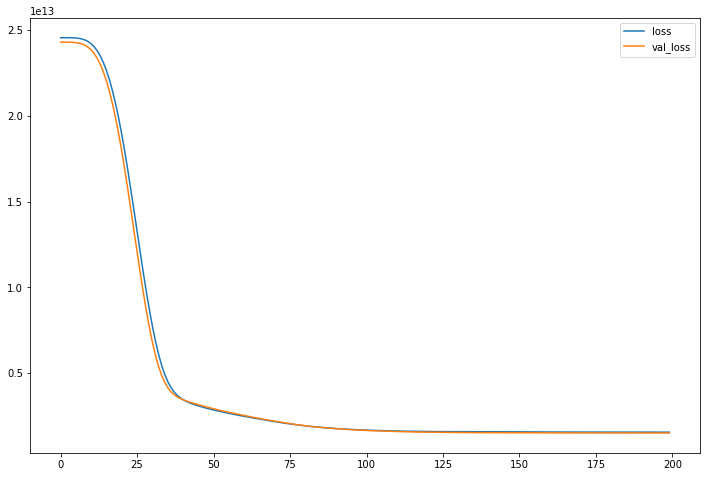

In [348]:
#Plot loss function
loss_df = pandas.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 1012191.7474446337
MSE: 1508478071196.2312
RMSE: 1228201.1525789378
VarScore: 0.3714626304045555


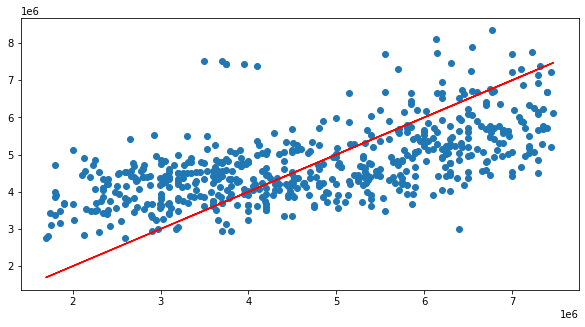

In [349]:
#Evaluate with test data
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')